In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('../src')

In [3]:
from nlp import utils, vocabulary

In [4]:
lyrics = pd.read_csv('../data/interim/genius_lyrics.csv')

In [5]:
lyrics.head()

,msd_id,lyrics
0,TRAAAAW128F429D538,"\n\n[Verse 1]\nAlright, I might\nHave had a li..."
1,TRAAABD128F429CF47,"\n\nDarling, I don't know much\nBut I know I l..."
2,TRAAADZ128F9348C2E,\n\nSiento una pena muy honda dentro del alma\...
3,TRAAAEF128F4273421,\n\nAdam Ant/Marco Pirroni\nEvery girl is a so...
4,TRAAAFD128F92F423A,"\n\nI've just erased it's been a while, I've g..."


In [6]:
len(lyrics)

6179

In [7]:
lyrics['length'] = lyrics.lyrics.apply(lambda x: len(x))

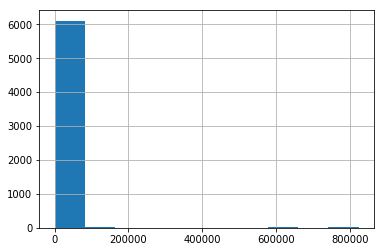

In [8]:
lyrics['length'].hist()

In [9]:
lyrics = lyrics[lyrics.length < 2000]

In [10]:
len(lyrics)

4204

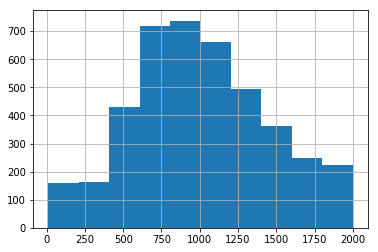

In [11]:
lyrics['length'].hist()

In [14]:
full_text = lyrics['lyrics'].str.cat()
words = full_text.split(' ')

In [15]:
# "canonicalize_word" performs a few tweaks to the token stream of
# the corpus.  For example, it replaces digits with DG allowing numbers
# to aggregate together when we count them below.
# You can read the details in utils.py if you're really curious.
token_feed = (utils.canonicalize_word(w) for w in words)

# Collect counts of tokens and assign wordids.
vocab = vocabulary.Vocabulary(token_feed)
print("Vocabulary size: {:,}".format(vocab.size))

# Print out some (debugging) statistics to make sure everything went
# as we expected.  (Unsurprisingly, you should see "the" as the most popular word.)
print("Most common unigrams:")
for word, count in vocab.unigram_counts.most_common(10):
    print("\"{:s}\": {:,}".format(word, count))

Vocabulary size: 120,374
Most common unigrams:
"the": 23,740
"to": 14,751
"you": 14,363
"i": 13,890
"a": 13,691
"and": 8,822
"my": 8,622
"me": 7,709
"of": 7,692
"in": 7,459


In [16]:
vocab.

0